In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# get calibration data
calibration_file = r'/users/nik/Dropbox/Manuals/BlueFors/rx_102B_calibration_data.txt'
data = np.loadtxt(calibration_file)
log_R = data[:,1]
T = data[:,2]
log_T = np.log10(T)

# get Chebyshev coefficients 
coef = np.polynomial.chebyshev.chebfit(log_R, log_T, 6)

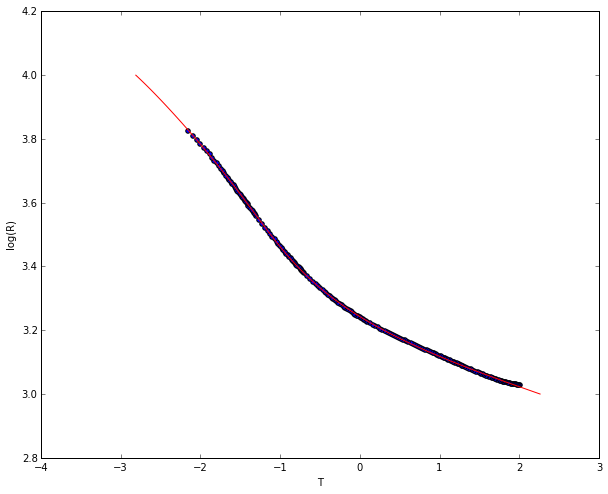

In [6]:
# plot calibration data and chebyshev fit
test_R = np.log10(np.linspace(1e3, 1e4, 100))

fig, ax = plt.subplots(1,1, figsize = (10,8))
ax.scatter(log_T, log_R)
ax.plot(np.polynomial.chebyshev.chebval(test_R, coef), test_R, 'r')
ax.set_xlabel('T')
ax.set_ylabel('log(R)')

In [4]:
def print_rx102B_temp(resistance, T_n):
    log_resistance = np.log10(resistance)
    calc_temp = np.polynomial.chebyshev.chebval(log_resistance, T_n)
    calc_temp = np.power(10, calc_temp)*1000
    print('The current temperature is approximately {0:0.2f}mK'.format(calc_temp))

In [5]:
print_rx102B_temp(7010, coef)

The current temperature is approximately 6.06mK
